In [1]:
from src.test_non_local_switching_non_stationary_model import load_data

is_ripple, spikes, position, speed, env, time = load_data(work_computer=False)


In [2]:
from src.test_non_local_switching_non_stationary_model import (
    setup_nonlocal_switching_model,
)

(
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    state_names,
) = setup_nonlocal_switching_model(
    is_ripple,
    spikes,
    position,
    speed,
    env,
    no_spike_rate_threshold=0.01,
    is_stationary_discrete_transition=True,
    include_no_spike_state=True,
    emission_knot_spacing=16,
)


Text(0.5, 1.0, 'Discrete State Transition')

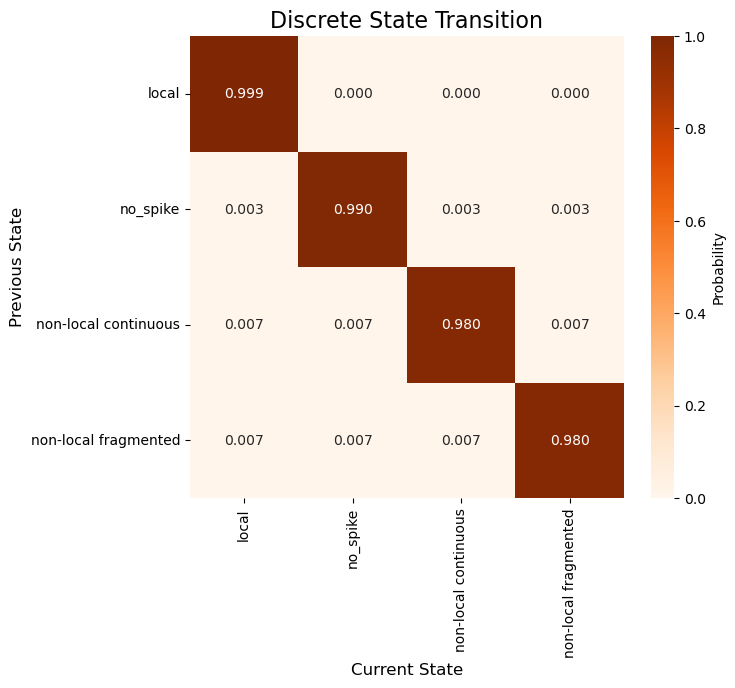

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)

In [4]:
discrete_state_transitions.sum(axis=1)

array([1., 1., 1., 1.])

In [5]:
from src.test_non_local_switching_non_stationary_model import fit_switching_model
import numpy as np

stickiness = np.zeros((4,1))
stickiness[0] = 65
stickiness[1] = 100_000
stickiness[2] = 65
stickiness[3] = 65

(
    predicted_state,
    acausal_posterior,
    acausal_state_probabilities,
    causal_posterior,
    marginal_log_likelihoods,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    non_local_rates,
    log_likelihood,
) = fit_switching_model(
    spikes,
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    env,
    discrete_transition_coefficients=discrete_transition_coefficients,
    discrete_transition_design_matrix=discrete_transition_design_matrix,
    max_iter=20,
    fit_inital_conditions=False,
    fit_discrete_transition=True,
    fit_likelihood=False,
    concentration=1.1,
    stickiness=stickiness,
)


[[9.99000000e-01 3.33333333e-04 3.33333333e-04 3.33333333e-04]
 [3.33333333e-03 9.90000000e-01 3.33333333e-03 3.33333333e-03]
 [6.66666667e-03 6.66666667e-03 9.80000000e-01 6.66666667e-03]
 [6.66666667e-03 6.66666667e-03 6.66666667e-03 9.80000000e-01]]
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1907597.4629461917
[[9.93284486e-01 1.14647114e-03 5.17942966e-03 3.89613572e-04]
 [4.13164431e-03 9.93825078e-01 1.72006240e-03 3.23215536e-04]
 [5.62780412e-03 1.84050652e-03 9.90535178e-01 1.99651138e-03]
 [1.83807966e-02 8.07678764e-03 2.62880996e-02 9.47254316e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -1905344.1570143779, change: 2253.305931813782
[[9.87655262e-01 2.04843879e-03 1.01109199e-02 1.85378921e-04]
 [6.27486516e-03 9.93057749e-01 6.08165557e-04 5.92204691e-05]
 [7.21958065e-03 9.17728632e-04 9.90381193e-01 1.48149789e-03]
 [2.94102090e-02 6.79922582e-03 3.15273994e-02 9.32263166e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 3, likelihood: -1905253.8143896938, change: 90.34262468409725
Estimating predicted state
Done


In [6]:
# non_local_rates = np.load("non_local_rates.npy")

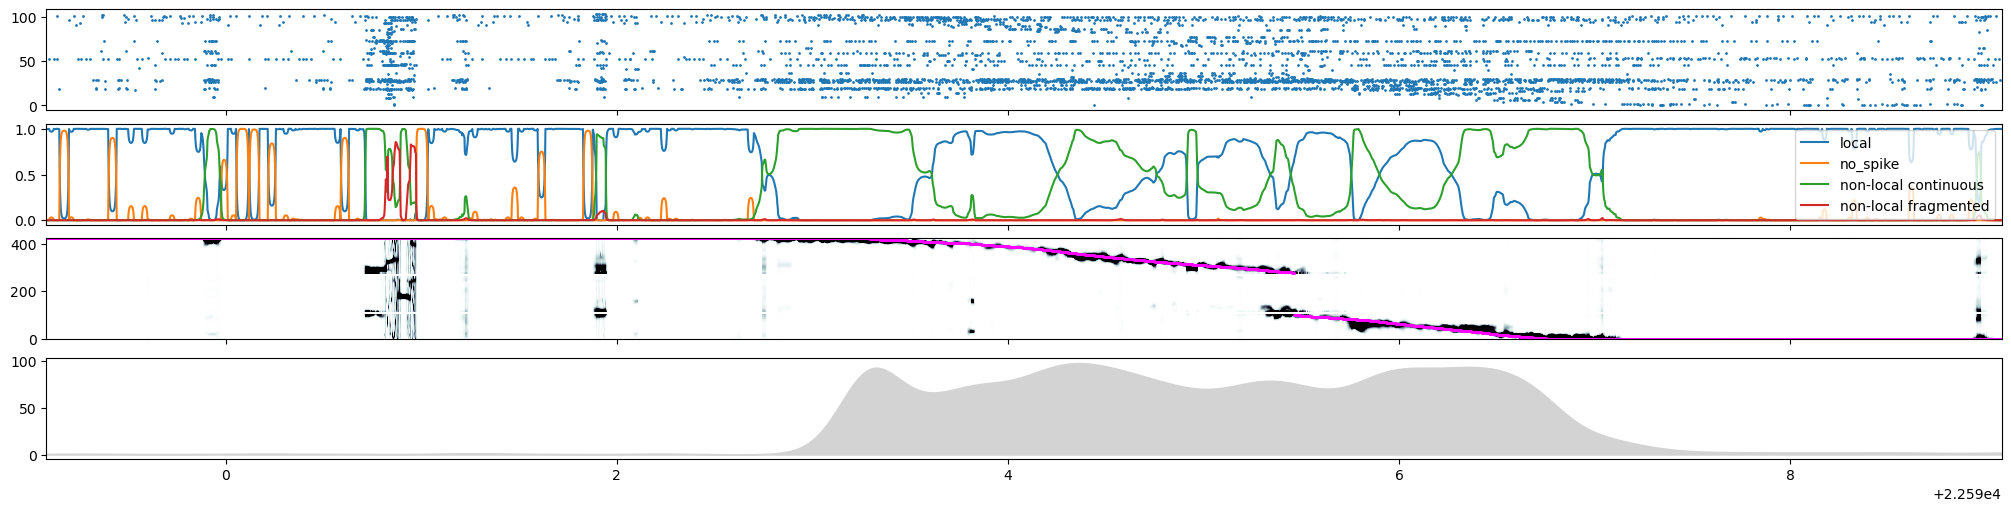

In [7]:
from src.test_non_local_switching_non_stationary_model import plot_switching_model


plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(100_000, 105_000),
)


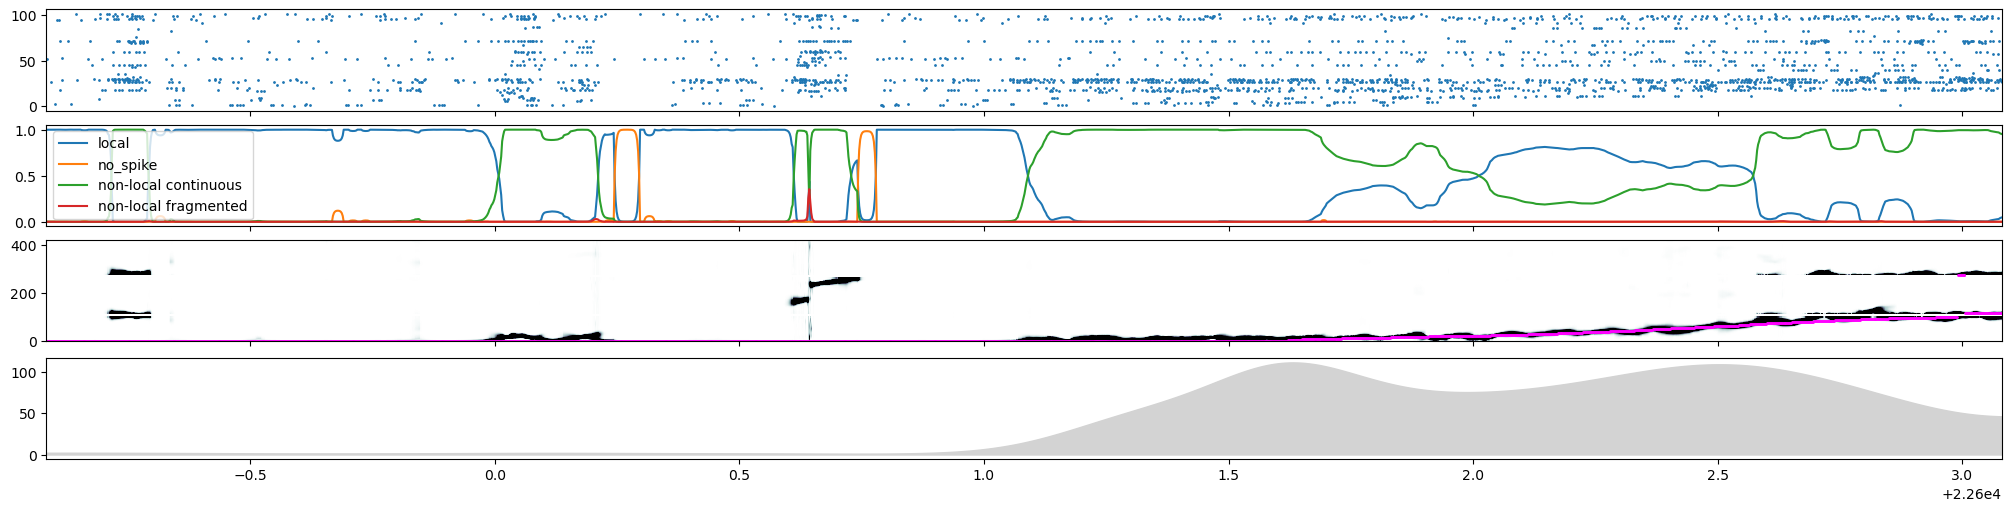

In [8]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(105_000, 107_000),
)


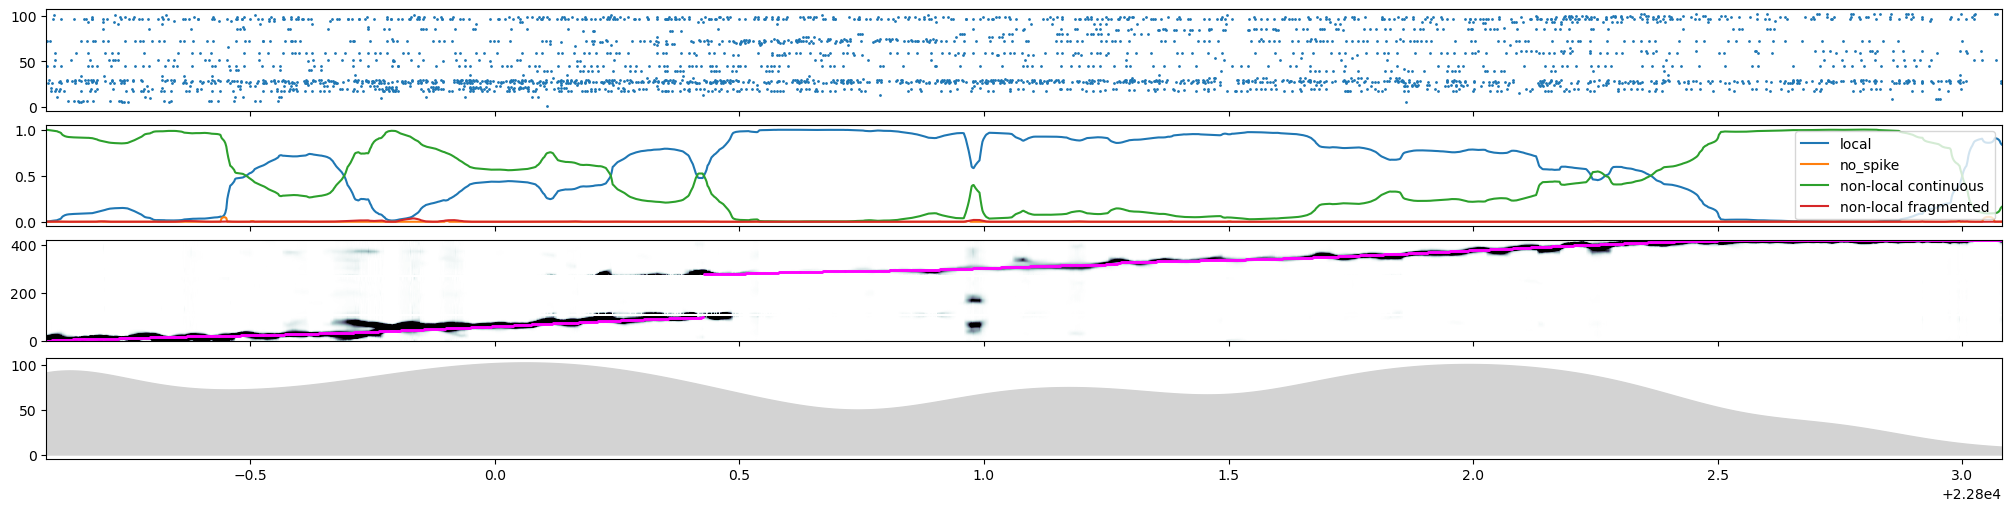

In [9]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(205_000, 207_000),
)


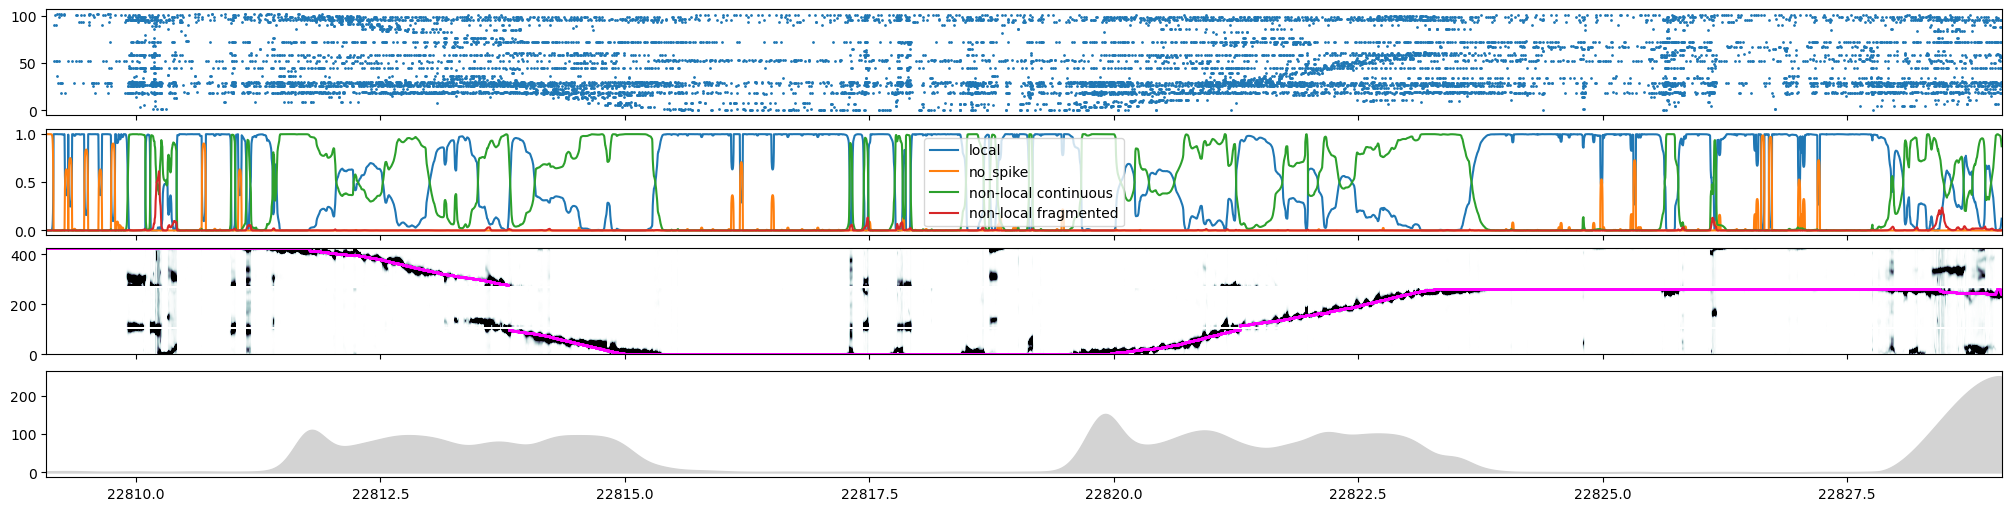

In [10]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(210_000, 220_000),
)


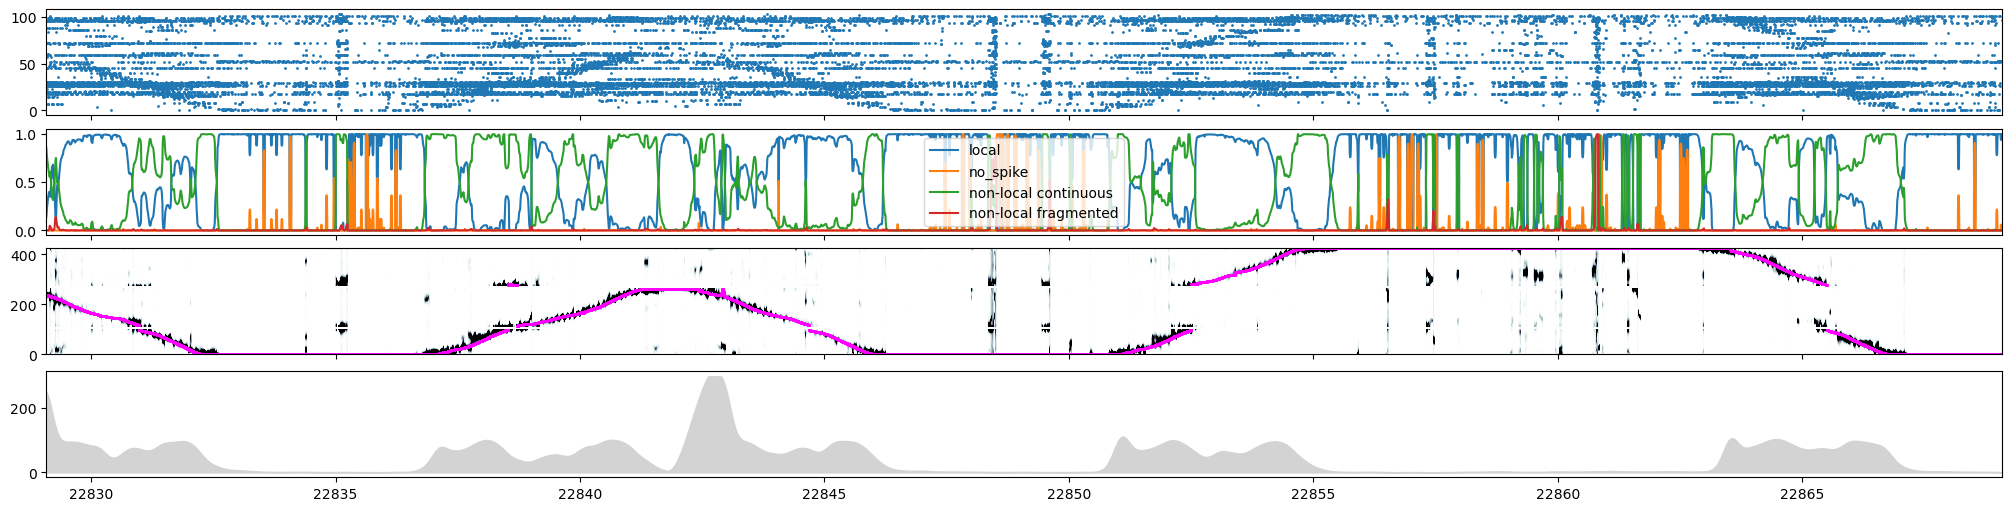

In [11]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 240_000),
)


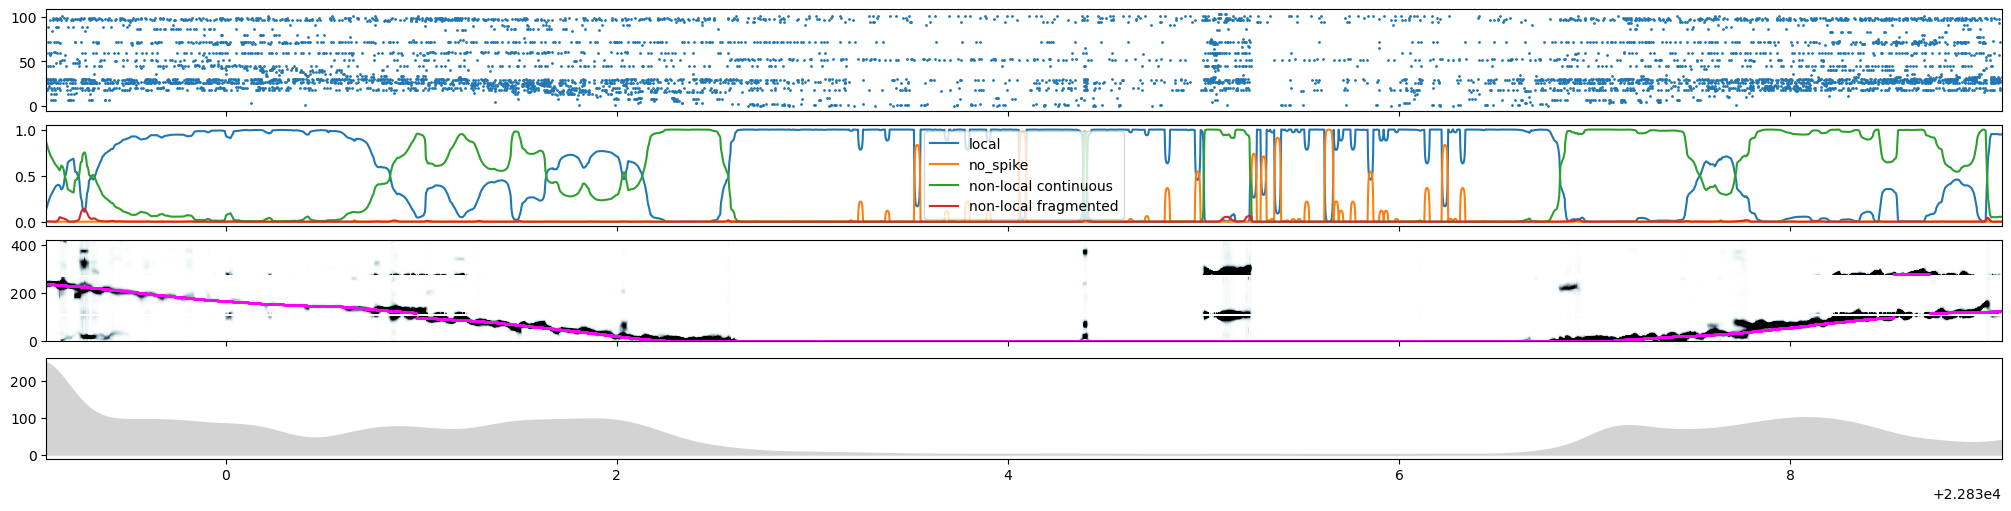

In [12]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 225_000),
)


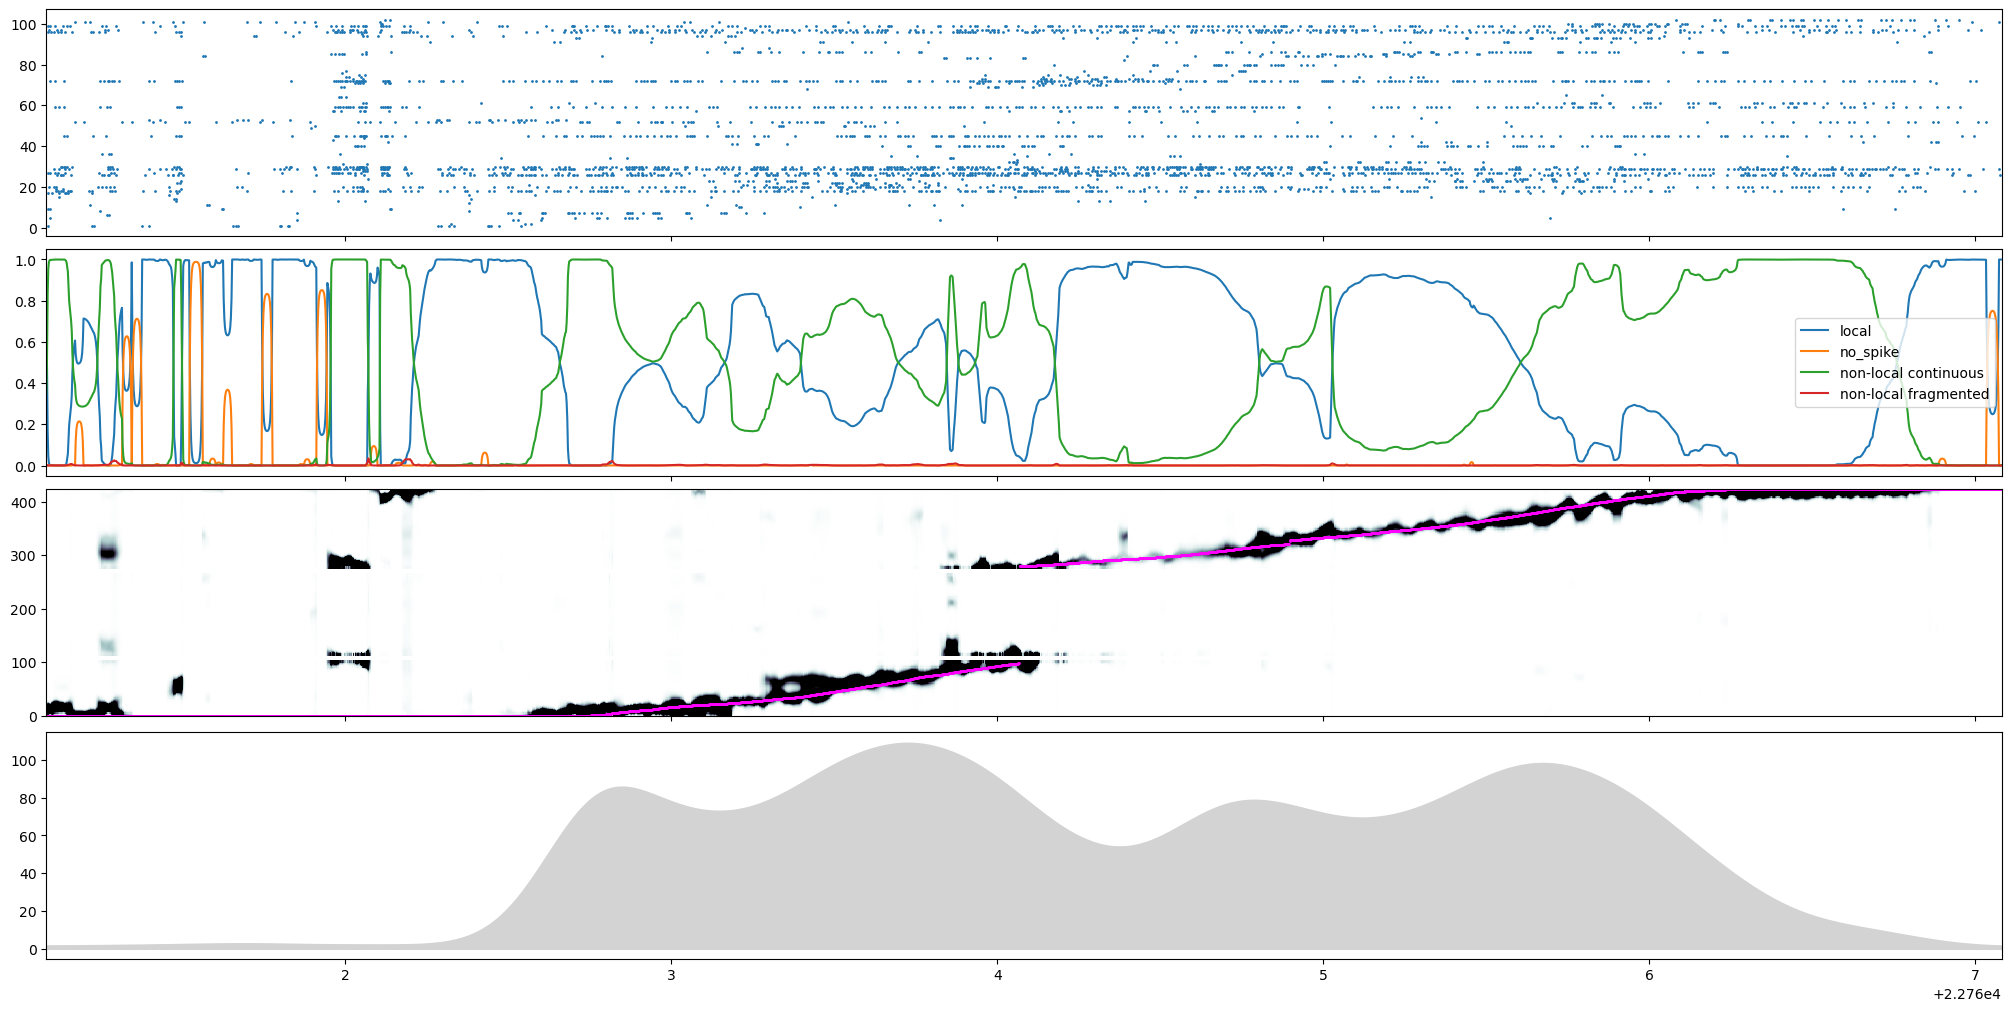

In [13]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(186_000, 189_000),
    figsize=(20, 10),
)


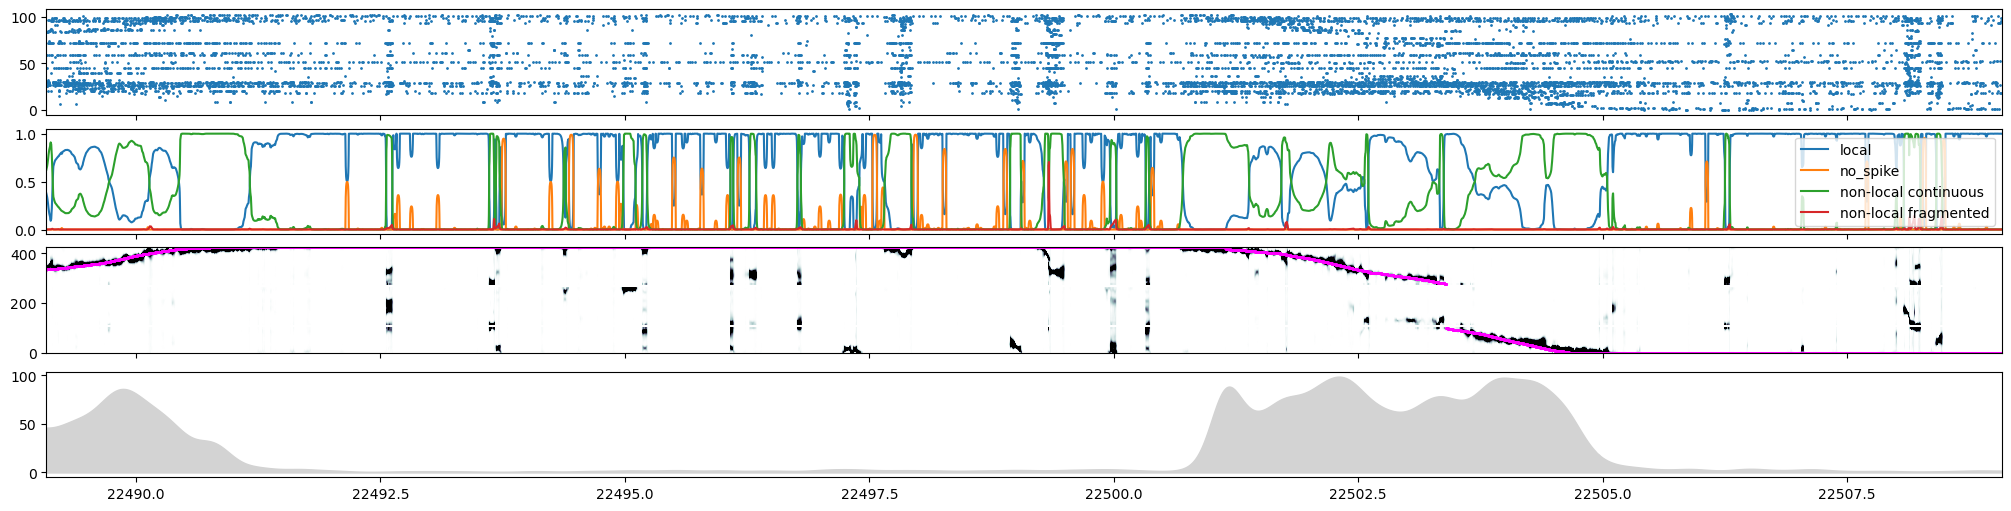

In [14]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(50_000, 60_000),
)


Text(0.5, 1.0, 'Discrete State Transition')

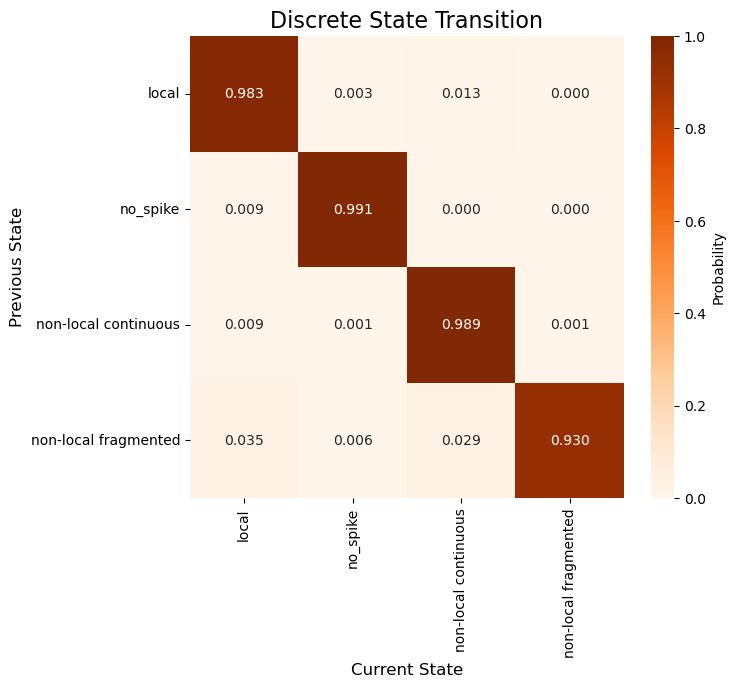

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)